# k-NN Analysis using CIFAR-like Dataset with Word Labels

## 1. Importing Libraries and Dataset

In [8]:
# This is just to fix the autocompletion issue in jupyter (if you have it)
%config Completer.use_jedi = False

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # to normalize the feature
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
# Load the provided dataset
data = pd.read_csv('cifar.csv')

# Each row contains the data of one image. Each column is for a pixel.

data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cifar.csv'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, Category to Pixel783
dtypes: int64(784), object(1)
memory usage: 119.8+ MB


In [5]:
data.describe()

,Pixel000,Pixel001,Pixel002,Pixel003,Pixel004,Pixel005,Pixel006,Pixel007,Pixel008,Pixel009,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,0.00210,0.005400,0.027500,0.109450,0.232850,0.373200,0.734150,2.160850,5.723600,14.228500,...,34.89595,23.707500,16.845500,17.341750,22.279350,17.875600,8.665650,2.831350,0.88770,0.076650
std,0.15999,0.199682,0.580138,2.583119,4.072267,5.287184,7.420298,13.909171,24.116386,37.893099,...,57.63887,49.027238,41.948355,43.001823,50.987857,45.236598,29.862265,17.612601,9.44832,2.164396
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.00000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,16.00000,16.000000,56.000000,164.000000,217.000000,230.000000,213.000000,218.000000,254.000000,255.000000,...,255.00000,255.000000,254.000000,255.000000,252.000000,255.000000,250.000000,255.000000,255.00000,170.000000


In [6]:
# Separate the features and labels
X = data.drop(columns=['Category']).values
y = data['Category'].values

# We have 20000 rows with 784 feature. Each feature represent a pixel
print(X.shape)
print(y.shape)

(20000, 784)
(20000,)


In [7]:
# Reshape the flattened images to 28x28 pixel (for visualization)
X_reshaped = X.reshape(-1, 28, 28)

# Now X_reshaped  is 20000 stack of images instead of stack of rows
X_reshaped.shape

(20000, 28, 28)

In [8]:
# The labels
y_words = data['Category']
y_words.shape

(20000,)

In [9]:
y_words.head()

0      Pullover
1    Ankle_boot
2         Shirt
3       T-shirt
4         Dress
Name: Category, dtype: object

In [11]:
# We will conver the label (target from words to integers)
# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_encoded = label_encoder.fit_transform(y_words)


In [12]:
y_encoded

array([3, 0, 5, ..., 8, 2, 8])

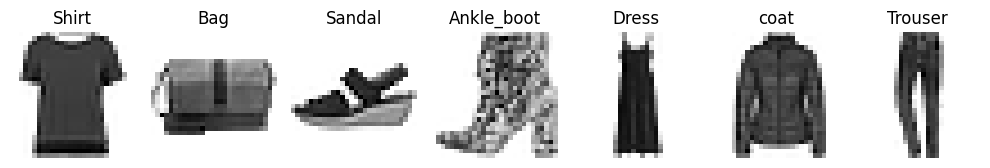

In [13]:
# Display 7 random samples from the dataset
# running this cell again will visualize new sample

# Take a random subset of the data 
subset_size = int(0.01 * len(X))
X_subset = X[:subset_size]
y_subset =  data.Category[:subset_size]


#create array of 7 random indices
random_indices = np.random.choice(X_subset.shape[0], 7, replace=False)
#select random images and their label
random_images = X_reshaped[random_indices]
random_labels_words = y_subset[random_indices]


fig, axes = plt.subplots(1, 7, figsize=(10, 3))
for ax, image, label in zip(axes, random_images, random_labels_words):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(label)
plt.tight_layout()
plt.show()

In [14]:
X.shape

(20000, 784)

In [15]:
# Take a subset of the data to use (10% of the data) to speed up the process
# carefull not to run it twice as that will reduce the size of your data
subset_size = int(0.1 * len(X))
X = X[:subset_size]
y_encoded = y_encoded [:subset_size]
#y_encoded = y[:subset_size]

In [16]:
X.shape, y_encoded.shape

((2000, 784), (2000,))

## 2. Preprocessing and Data Splitting

In [17]:
# rescale the features

# Standardize the subset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the data into a training set and a test set (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.4, random_state=42)

In [18]:
X.shape

(2000, 784)

In [19]:
X_train.shape

(1200, 784)

## 3. kNN Classifier Training and Evaluation

In [20]:
# List of metrics to compare
metrics = ['euclidean', 'manhattan', 'hamming','cosine', 'chebyshev']

# Dictionary to store accuracies for each metric
accuracy_results = {}

# Train and evaluate kNN for each metric
for metric in metrics:
    knn_cifar = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn_cifar.fit(X_train, y_train)
    accuracy_results[metric] = knn_cifar.score(X_test, y_test)

# display the accuracy results
accuracy_results

{'euclidean': 0.75375,
 'manhattan': 0.77875,
 'hamming': 0.4625,
 'cosine': 0.775,
 'chebyshev': 0.55875}

## 4. Confusion Matrix

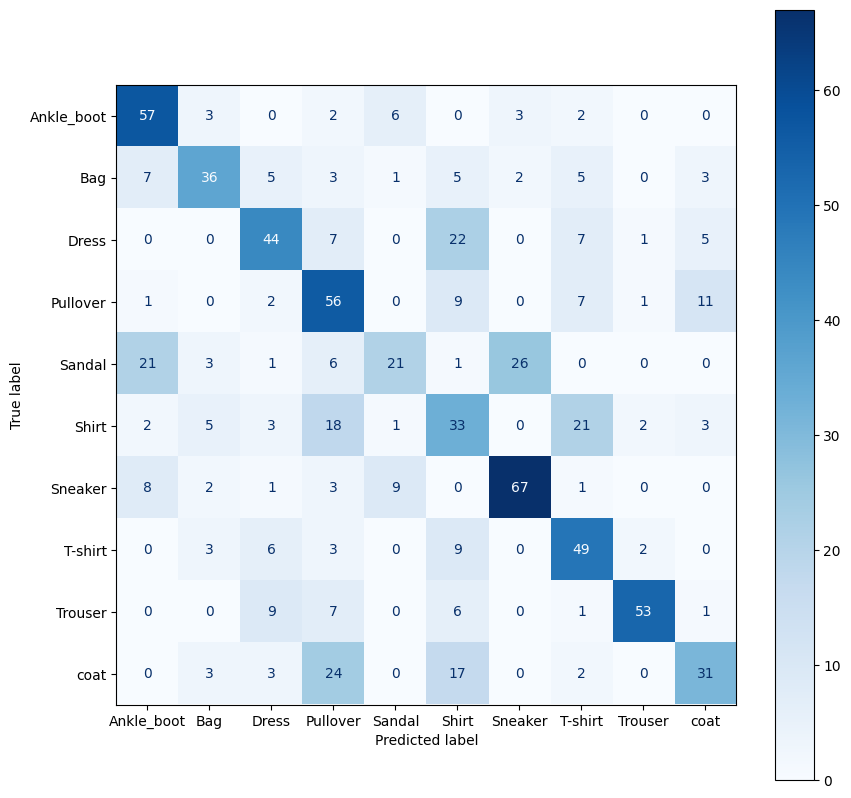

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix

y_pred = knn_cifar.predict(X_test)

# Make predictions
y_pred_encoded = knn_cifar.predict(X_test)

# Decode the predictions to original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred_encoded)

y_test_decoded = label_encoder.inverse_transform(y_test)



# Confusion matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded,  labels=label_encoder.classes_)
#cm = confusion_matrix(y_test_decoded, y_pred_decoded)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)


fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.show()

In [22]:
label_encoder.classes_

array(['Ankle_boot', 'Bag', 'Dress', 'Pullover', 'Sandal', 'Shirt',
       'Sneaker', 'T-shirt', 'Trouser', 'coat'], dtype=object)

## 6. Displaying Random Prediction Samples

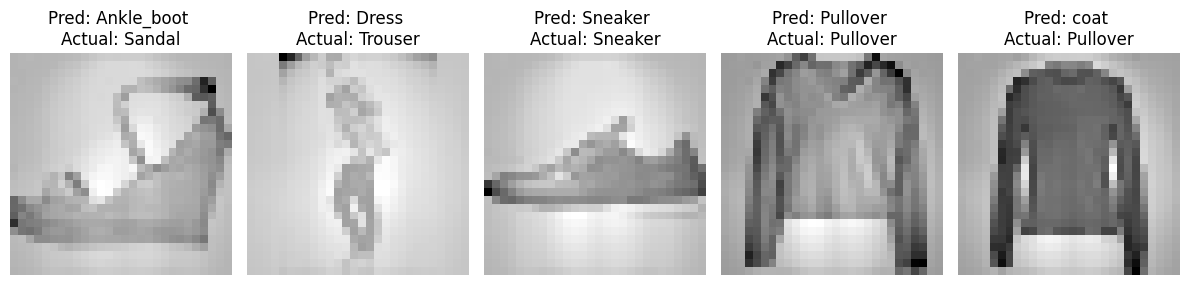

In [23]:
# Display 5 random samples from the test set alongside their predicted labels
random_indices_pred = np.random.choice(X_test.shape[0], 5, replace=False)

# select random sample and reshape for visualization
random_images_pred = X_test[random_indices_pred].reshape(-1, 28, 28)
random_labels_pred = y_pred_decoded[random_indices_pred]
#get the real labels of the prediction
real_labels = y_test_decoded[random_indices_pred]

fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for ax, image, label_pred, label_real in zip(axes, random_images_pred, random_labels_pred,real_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {label_pred} \nActual: {label_real}')
plt.tight_layout()
plt.show()

## 7. Displaying Random Misclassified Samples

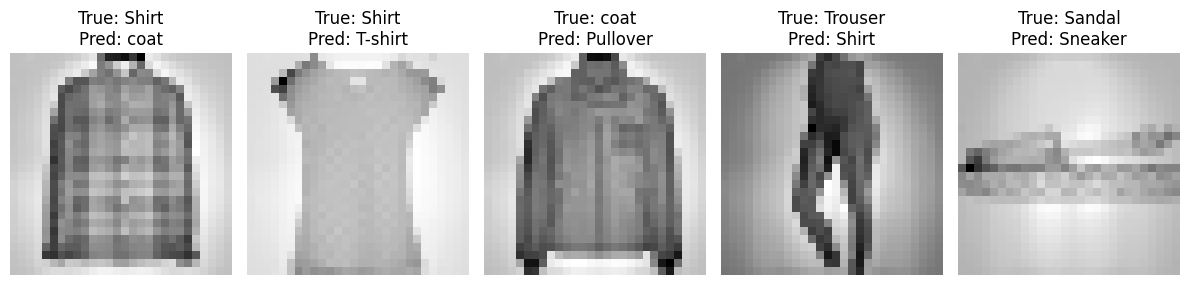

In [24]:
# Identify the indices of the misclassified samples
misclassified_indices = np.where(y_pred_decoded != y_test_decoded)[0]

# Randomly select 5 misclassified samples
random_misclassified_indices = np.random.choice(misclassified_indices, 5, replace=False)
random_misclassified_images = X_test[random_misclassified_indices].reshape(-1, 28, 28)
random_misclassified_labels = y_test_decoded[random_misclassified_indices]
random_misclassified_predictions = y_pred_decoded[random_misclassified_indices]

# Display the misclassified samples, their true labels, and their predicted labels
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for ax, image, true_label, pred_label in zip(axes, random_misclassified_images, random_misclassified_labels, random_misclassified_predictions):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'True: {true_label}\nPred: {pred_label}')
plt.tight_layout()
plt.show()

In [ ]:
# Q1 
# Compare the images that we displaied at the beginning with the images that we use for the prediction
# note that the latter are more gray and dull. Why is that? 

In [ ]:
# Q2
# What is the distance metric of the model that we have used to predict the class 
# of these images at the very end?

In [ ]:
#Q3 
# There are at least three things in this code can be modified/adjusted to improve
# the accuracy of the knn model that we have used to predict and visualize the results in 
# the last cell.

# what are these improvements?

# implement them to improve the accurace.

# write comments above your modifications starting with "# Answer:"

In [ ]:
# Q4
# give an estimate of the minimum amout of memory this knn takes. why?
